<a href="https://colab.research.google.com/github/sjpmpzx/CS4650/blob/main/HW5/CS4650_HW_5_News_API_%26_Covid_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install spacy
!pip install newsapi-python

In [7]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=752e7440cdc3cbf943939012fb4b6433532f6bf7cbb900718896aa6f94f836b9
  Stored in directory: /tmp/pip-ephem-wheel-cache-7w160x_2/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [8]:
import en_core_web_lg
from newsapi import NewsApiClient

nlp_eng = en_core_web_lg.load()
newsapi = NewsApiClient(api_key='89bb1cd64b2f470784144b538ac9d3d2')

In [16]:
# articles = []
# for p in range(1,6):
#     temp = newsapi.get_everything(q='coronavirus', language='en', from_param='2021-09-22', to='2021-10-22', sort_by='relevancy', page=p)
#     articles.extend(temp["articles"])
articles = newsapi.get_everything(q='coronavirus', language='en', from_param='2021-09-22', to='2021-10-22', sort_by='relevancy', page_size=100)

In [17]:
print(articles)

{'status': 'ok', 'totalResults': 42166, 'articles': [{'source': {'id': None, 'name': 'New York Times'}, 'author': 'Emma G. Fitzsimmons, Joseph Goldstein and Sharon Otterman', 'title': "New York City Mandates Vaccines for Its Workers to ‘End the Covid Era'", 'description': 'Mayor Bill de Blasio says 46,000 unvaccinated city workers must get a coronavirus shot by November or lose their paychecks.', 'url': 'https://www.nytimes.com/2021/10/20/nyregion/nyc-vaccine-mandate.html', 'urlToImage': 'https://static01.nyt.com/images/2021/10/20/nyregion/20nymandate/20nymandate-facebookJumbo.jpg', 'publishedAt': '2021-10-20T20:50:14Z', 'content': 'Gregory Floyd, president of Teamsters Local 237, which represents approximately 7,400 employees in the public housing system, where just six in 10 workers are vaccinated, said he believes many worker… [+1725 chars]'}, {'source': {'id': None, 'name': 'New York Times'}, 'author': 'The New York Times', 'title': 'Most U.S. Health Workers Comply With Vaccine Man

In [18]:
import pickle

filename = 'articlesCOVID_full.pckl'
pickle.dump(articles, open(filename, 'wb'))
filename = 'articlesCOVID_full.pckl'
loaded_model = pickle.load(open(filename, 'rb'))
filepath = '/content/drive/MyDrive/Colab Notebooks/articlesCOVID_full.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [2]:
# import pickle

# filename = '/content/drive/MyDrive/Colab Notebooks/articlesCOVID.pckl'
# articles = pickle.load(open(filename, 'rb'))

-------

In [25]:
import pandas as pd

dados = []
# for i, article in enumerate(articles):
for x in articles['articles']:
    title = x['title']
    description = x['description']
    content = x['content']
    dados.append({'title':title, 'desc':description, 'content':content})
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

,title,desc,content
0,New York City Mandates Vaccines for Its Worker...,"Mayor Bill de Blasio says 46,000 unvaccinated ...","Gregory Floyd, president of Teamsters Local 23..."
1,Most U.S. Health Workers Comply With Vaccine M...,Although some have quit their jobs rather than...,Hundreds of sought-after nurses are leaving so...
2,Experts Call for U.S. Vaccination Push as Cold...,Experts say that steady inoculation rates are ...,"LiveUpdated Oct. 8, 2021, 5:56 a.m. ET\r\nOct...."
3,How a Vaccine Mandate Could Worsen a Shortage ...,"Some 250,000 home health care workers must get...","JASA, an organization serving older adults in ..."
4,New York Hospitals Face Possible Mass Firings ...,"With a Monday deadline looming, thousands of h...",New York States vaccination requirement for he...


In [39]:
def get_keywords_eng(content):
    result = []
    token = nlp_eng(content)
    punctuation = string.punctuation
    pos_tag = ['VERB', 'NOUN', 'PROPN']

    for token in token:
        if (token.text in nlp_eng.Defaults.stop_words or token.text in punctuation):
            continue
        if (token.pos_ in pos_tag):
            result.append(token.text)

    return result

In [47]:
from collections import Counter
import string

results = []
for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])

df['keywords'] = results

In [48]:
df.head()

,title,desc,content,keywords
0,New York City Mandates Vaccines for Its Worker...,"Mayor Bill de Blasio says 46,000 unvaccinated ...","Gregory Floyd, president of Teamsters Local 23...","[#Gregory, #Floyd, #president, #Teamsters, #Lo..."
1,Most U.S. Health Workers Comply With Vaccine M...,Although some have quit their jobs rather than...,Hundreds of sought-after nurses are leaving so...,"[#Hundreds, #sought, #nurses, #leaving, #U.S.]"
2,Experts Call for U.S. Vaccination Push as Cold...,Experts say that steady inoculation rates are ...,"LiveUpdated Oct. 8, 2021, 5:56 a.m. ET\r\nOct....","[#Oct., #a.m., #ET, #LiveUpdated, #Experts]"
3,How a Vaccine Mandate Could Worsen a Shortage ...,"Some 250,000 home health care workers must get...","JASA, an organization serving older adults in ...","[#JASA, #organization, #serving, #adults, #New]"
4,New York Hospitals Face Possible Mass Firings ...,"With a Monday deadline looming, thousands of h...",New York States vaccination requirement for he...,"[#States, #New, #York, #vaccination, #requirem..."


In [42]:
filename = 'articlesCOVID_full.pckl'
pickle.dump(articles, open(filename, 'wb'))
filename = 'articlesCOVID_full.pckl'
loaded_model = pickle.load(open(filename, 'rb'))
filepath = '/content/drive/MyDrive/Colab Notebooks/articlesCOVID_full.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

---

In [46]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/articlesCOVID.csv', encoding='utf-8', index=False)

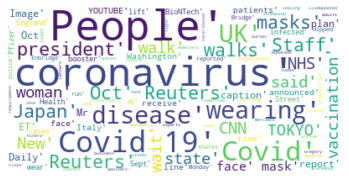

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()